##Part (a)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
mean = [0, 0]
cov = [[1, 0], [0, 1]]
w = np.random.multivariate_normal(mean, cov, 1)
#w = np.array([[w0[0]],[w1[0]]])
#plt.plot(w0, w1, 'x')
#plt.axis('equal')
#plt.show()

In [0]:
w = w.reshape(2,1)
b = np.random.normal(0,1,1)

In [0]:
w

array([[-0.28094965],
       [-0.69587785]])

In [0]:
x_1 = []
x_2 = []
y = []
n = 100
for i in range(n):
  x_1.append(np.random.uniform(-3,3))
  x_2.append(np.random.uniform(-3,3))
  x = np.array([[x_1[i]],[x_2[i]]])
  wTx = float(np.matmul(w.T,x))
  y.append(np.sign(wTx+b[0]))

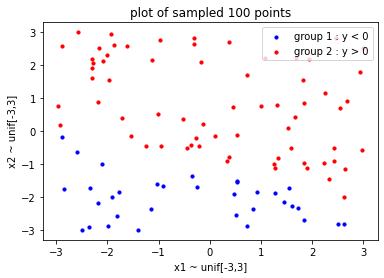

In [0]:
fig, ax = plt.subplots()
for i in range(n):
  if y[i] == -1.0:
    plt.scatter(x_1[i],x_2[i],color='red',s=10)
  else:
    plt.scatter(x_1[i],x_2[i],color='blue',s=10)
#plotting wTx + b
#x1 = np.linspace(-3,3,1000)
#x2 = []
#for i in range(1000):
#  temp = -(w[0][0]*x1[i]+b[0])/w[1][0]
#  x2.append(temp)
#plt.plot(x1,x2)
plt.legend(['group 1 : y < 0','group 2 : y > 0'],loc='upper right')
plt.xlabel('x1 ~ unif[-3,3]')
plt.ylabel('x2 ~ unif[-3,3]')
plt.title('plot of sampled 100 points')
plt.savefig('2a.png')
plt.show()


##part(b)

In [0]:
from cvxopt import matrix,solvers

In [0]:
def svm(x_1train, x_2train, y_train, c=0.001):
  ##making the matrix P,q,g,h
  # p = 103x103
  # q = 103x1
  # G = 200x103
  # h = 200x1
  # q = w1 w2 s1 s2 ... s100 b
  accuracy_old = 0.0
  while c<5.0:
    p = np.zeros((103,103))
    p[0][0] = 0.5
    p[1][1] = 0.5
    q = np.zeros((103,1))
    for i in range(2,102):
      q[i] = c

    h = np.zeros((200,1))
    for i in range(100):
      h[i] = -1.0

    G = np.zeros((200,103))
    for i in range(100):
      G[i][102] = -1*y_train[i]
      G[i][0] = -1*y_train[i]*x_1train[i]
      G[i][1] = -1*y_train[i]*x_2train[i]
      G[i][i+2] = -1.0
      G[i+100][i+2] = -1.0

    P = matrix(p,tc='d')
    Q = matrix(q,tc='d')
    H = matrix(h,tc='d')
    g = matrix(G,tc='d')

    sol = solvers.qp(P,Q,g,H)

    solution = sol['x']
    optimal_val = sol['primal objective']

    y_pred = []
    accuracy = 0
    for i in range(100):
      w_hatTx = solution[0]*x_1train[i]+solution[1]*x_2train[i]+solution[102]
      y_pred.append(np.sign(w_hatTx))
      if(y_pred[i]==y_train[i]):
        accuracy = accuracy+1
    print('accuracy for c = ',c,' on training data is ',accuracy/100)
    if accuracy > accuracy_old:
      c_opt = c
      accuracy_old = accuracy
      w_1pred = solution[0]
      w_2pred = solution[1]
      b_pred = solution[102]
    c = c+0.001
  print('optimal c is :',c_opt,' and accuracy is :',accuracy_old/100)
  return w_1pred,w_2pred,b_pred

In [0]:
w_1solved, w_2solved, b_solved = svm(x_1,x_2,y,0.001)

Streaming output truncated to the last 5000 lines.
 6:  1.4651e+01  1.4050e+01  7e-01  2e-04  1e-04
 7:  1.4363e+01  1.4354e+01  9e-03  2e-06  2e-06
 8:  1.4358e+01  1.4358e+01  9e-05  2e-08  2e-08
 9:  1.4358e+01  1.4358e+01  9e-07  2e-10  2e-10
Optimal solution found.
accuracy for c =  4.614999999999876  on training data is  0.99
     pcost       dcost       gap    pres   dres
 0: -1.6918e+03  1.6754e+03  6e+03  1e+01  1e+01
 1:  2.1774e+02 -2.6642e+02  1e+03  2e+00  1e+00
 2:  3.6932e+01 -6.4551e+01  2e+02  3e-01  2e-01
 3:  1.9867e+01 -2.2628e+00  4e+01  5e-02  4e-02
 4:  1.6667e+01  9.9560e+00  1e+01  1e-02  9e-03
 5:  1.5480e+01  1.2695e+01  3e+00  2e-03  2e-03
 6:  1.4653e+01  1.4051e+01  7e-01  2e-04  1e-04
 7:  1.4364e+01  1.4356e+01  9e-03  2e-06  2e-06
 8:  1.4360e+01  1.4360e+01  9e-05  2e-08  2e-08
 9:  1.4360e+01  1.4360e+01  9e-07  2e-10  2e-10
Optimal solution found.
accuracy for c =  4.615999999999876  on training data is  0.99
     pcost       dcost       gap    pres 

###resampling 50 points for test

In [0]:
print(w,b)
print(w_1solved,w_2solved)
print(b_solved)

[[-0.28094965]
 [-0.69587785]] [-0.72439693]
-1.3812896751014265 -4.0043806413737055
-4.37307310447315


In [0]:
x_1test = []
x_2test = []
y_test = []
y_evaluated = []

for i in range(50):
  x_1test.append(np.random.uniform(-3,3))
  x_2test.append(np.random.uniform(-3,3))
  x_test = np.array([[x_1test[i]],[x_2test[i]]])
  wTx = float(np.matmul(w.T,x_test))
  y_test.append(np.sign(wTx+b[0]))
  wTx = float(np.matmul(np.array([[w_1solved],[w_2solved]]).T,x_test))
  y_evaluated.append(np.sign(wTx+b_solved))
accuracy_test = 0
for i in range(50):
  print('y evaluated :',y_evaluated[i],'y test :',y_test[i])
  if (y_test[i]==y_evaluated[i]):
    accuracy_test = accuracy_test+1
print('accuracy on test data of 50 points is : ',accuracy_test/50)

y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : 1.0 y test : 1.0
y evaluated : 1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : 1.0 y test : 1.0
y evaluated : 1.0 y test : 1.0
y evaluated : 1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : 1.0 y test : 1.0
y evaluated : 1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : 1.0 y test : 1.0
y evaluated : 1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : 

In [0]:
print(y_test)
print(y_evaluated)

[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0]
[-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0]


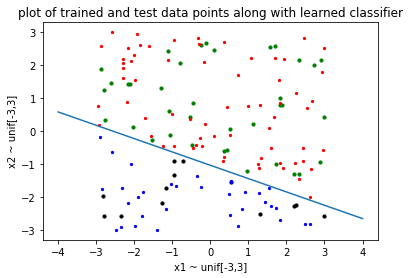

In [0]:
#plotting training data
for i in range(50):
  if y_test[i] == -1.0:
    plt.scatter(x_1test[i],x_2test[i],color='green',s=10)
  else:
    plt.scatter(x_1test[i],x_2test[i],color='black',s=10)


#plotting test data
for i in range(n):
  if y[i] == -1.0:
    plt.scatter(x_1[i],x_2[i],color='red',s=5)
  else:
    plt.scatter(x_1[i],x_2[i],color='blue',s=5)
#plotting wTx + b
x1 = np.linspace(-4,4,1000)
x2 = []
for i in range(1000):
  temp = -(w_1solved*x1[i]+b_solved)/w_2solved
  x2.append(temp)
#plt.plot(x1,x2)

x1 = np.linspace(-4,4,1000)
x2 = []
for i in range(1000):
  temp = -(w[0][0]*x1[i]+b[0])/w[1][0]
  x2.append(temp)
plt.plot(x1,x2)
plt.xlabel('x1 ~ unif[-3,3]')
plt.ylabel('x2 ~ unif[-3,3]')
plt.title('plot of trained and test data points along with learned classifier')
plt.savefig('2b.png')


plt.show()

In [0]:
b[0]

-0.22927982228738117

##Part (c) [train accuracy = 0.74]

In [0]:
cx_1 = []
cx_2 = []
cy = []
for i in range(100):
  cx_1.append(np.random.uniform(-3,3))
  cx_2.append(np.random.uniform(-3,3))
  if (cx_1[i]*cx_1[i])+(cx_2[i]*cx_2[i])/2 <= 2.0:
    cy.append(+1.0)
  else:
    cy.append(-1.0)

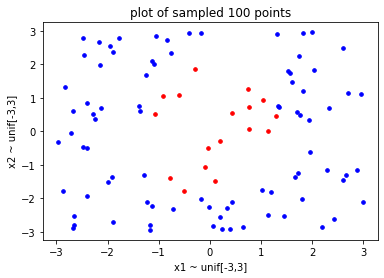

In [0]:
for i in range(100):
  if cy[i]==1.0:
    plt.scatter(cx_1[i],cx_2[i],color='red',s=13)
    #plt.legend('group 1')
  else:
    plt.scatter(cx_1[i],cx_2[i],color='blue',s=13)
    #plt.legend('group 2')
#plt.legend(['group 1','group 2 : y = -1.0'])
#plt.legend(['group 1 : y = +1.0'],loc='best')
plt.xlabel('x1 ~ unif[-3,3]')
plt.ylabel('x2 ~ unif[-3,3]')
plt.title('plot of sampled 100 points')
plt.savefig('2c1.png')

In [0]:
cw_1solved, cw_2solved, cb_solved = svm(cx_1,cx_2,cy,0.001)

Streaming output truncated to the last 5000 lines.
 5:  1.5110e+02  1.5110e+02  5e-06  3e-16  5e-15
Optimal solution found.
accuracy for c =  4.443999999999819  on training data is  0.83
     pcost       dcost       gap    pres   dres
 0: -1.2965e+03  6.8463e+02  2e+03  8e+00  2e+00
 1:  3.2642e+02  1.4278e+02  2e+02  1e-15  2e-15
 2:  1.5388e+02  1.4925e+02  5e+00  4e-16  1e-14
 3:  1.5116e+02  1.5111e+02  5e-02  2e-16  2e-15
 4:  1.5113e+02  1.5113e+02  5e-04  3e-16  2e-14
 5:  1.5113e+02  1.5113e+02  5e-06  2e-16  2e-14
Optimal solution found.
accuracy for c =  4.444999999999819  on training data is  0.83
     pcost       dcost       gap    pres   dres
 0: -1.2971e+03  6.8471e+02  2e+03  8e+00  2e+00
 1:  3.2646e+02  1.4281e+02  2e+02  1e-15  5e-15
 2:  1.5391e+02  1.4929e+02  5e+00  4e-16  9e-15
 3:  1.5119e+02  1.5115e+02  5e-02  3e-16  1e-14
 4:  1.5116e+02  1.5116e+02  5e-04  2e-16  1e-14
 5:  1.5116e+02  1.5116e+02  5e-06  2e-16  1e-14
Optimal solution found.
accuracy for c =  

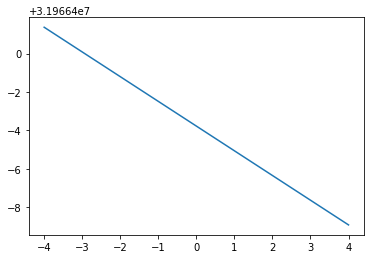

In [0]:


#plotting test data
#for i in range(100):
  #if cy[i] == -1.0:
    #plt.scatter(cx_1[i],cx_2[i],color='red',s=5)
  #else:
    #plt.scatter(cx_1[i],cx_2[i],color='green',s=5)
#plotting wTx + b
x1 = np.linspace(-4,4,100)
x2 = []
for i in range(100):
  temp = -(cw_1solved*x1[i]+cb_solved)/cw_2solved
  x2.append(temp)
plt.plot(x1,x2)


plt.show()

In [0]:
print(cw_1solved,cw_2solved,cb_solved)

4.0224844370185745e-08 3.128285842276552e-08 -1.0000002474601506


###test data (accuracy 0.7)

In [0]:
cx_1test = []
cx_2test = []
cy_test = []
cy_evaluated = []

for i in range(50):
  cx_1test.append(np.random.uniform(-3,3))
  cx_2test.append(np.random.uniform(-3,3))
  cx_test = np.array([[x_1test[i]],[x_2test[i]]])
  if (cx_1test[i]*cx_1test[i])+(cx_2test[i]*cx_2test[i])/2 <= 2.0:
    cy_test.append(+1.0)
  else:
    cy_test.append(-1.0)
  wTx = float(np.matmul(np.array([[cw_1solved],[cw_2solved]]).T,x_test))
  cy_evaluated.append(np.sign(wTx+cb_solved))
accuracy_test = 0
for i in range(50):
  print('y evaluated :',cy_evaluated[i],'y test :',cy_test[i])
  if (cy_test[i]==cy_evaluated[i]):
    accuracy_test = accuracy_test+1
print('accuracy on test data of 50 points is : ',accuracy_test/50)

y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : 1.0
y evaluated : -1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : 1.0
y evaluated : -1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : 1.0
y evaluated : -1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 

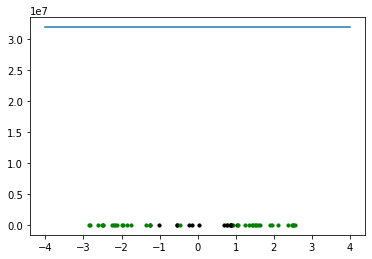

In [0]:

#plotting training data
for i in range(50):
  if cy_test[i] == -1.0:
    plt.scatter(cx_1test[i],cx_2test[i],color='green',s=10)
  else:
    plt.scatter(cx_1test[i],cx_2test[i],color='black',s=10)

#plotting test data
#for i in range(100):
  #if cy[i] == -1.0:
    #plt.scatter(cx_1[i],cx_2[i],color='red',s=5)
  #else:
    #plt.scatter(cx_1[i],cx_2[i],color='green',s=5)
#plotting wTx + b
x1 = np.linspace(-4,4,100)
x2 = []
for i in range(100):
  temp = -(cw_1solved*x1[i]+cb_solved)/cw_2solved
  x2.append(temp)
plt.plot(x1,x2)


plt.show()

In [0]:
cy_test

[-1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

##Part (d)

###data same as Question 2(c)

In [0]:
dx_1 = []
dx_2 = []
dy = []
for i in range(n):
  dx_1.append(cx_1[i])
  dx_2.append(cx_2[i])
  dy.append(cy[i])

###applying transformation $$[x_1\ x_2]\ ->\ [x_1^2\ x_2^2]$$ 

In [0]:
for i in range(n):
  dx_1[i] = dx_1[i]*dx_1[i]
  dx_2[i] = dx_2[i]*dx_2[i]
  

###plotting the data

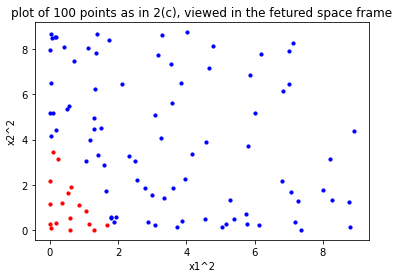

In [0]:
fig, ax = plt.subplots()
for i in range(n):
  if dy[i] == +1.0:
    plt.scatter(dx_1[i],dx_2[i],color='red',s=10)
  else:
    plt.scatter(dx_1[i],dx_2[i],color='blue',s=10)
#plotting wTx + b
#x1 = np.linspace(-3,3,1000)
#x2 = []
#for i in range(1000):
#  temp = -(w[0][0]*x1[i]+b[0])/w[1][0]
#  x2.append(temp)
#plt.plot(x1,x2)
#plt.legend(['group 1 : y < 0','group 2 : y > 0'],loc='upper right')
plt.xlabel('x1^2')
plt.ylabel('x2^2')
plt.title('plot of 100 points as in 2(c), viewed in the fetured space frame')
plt.savefig('2d1.png')
plt.show()

###solving for test data [accuracy = 1.0]

In [0]:
dw_1solved, dw_2solved, db_solved = svm(dx_1,dx_2,dy,0.001)

Streaming output truncated to the last 5000 lines.
 6:  1.4700e+01  1.4031e+01  1e+00  1e-03  3e-03
 7:  1.4475e+01  1.4383e+01  1e-01  1e-04  4e-04
 8:  1.4437e+01  1.4436e+01  1e-03  1e-06  4e-06
 9:  1.4437e+01  1.4437e+01  1e-05  1e-08  4e-08
Optimal solution found.
accuracy for c =  4.614999999999876  on training data is  1.0
     pcost       dcost       gap    pres   dres
 0: -1.6795e+03  1.5525e+03  5e+03  1e+01  3e+01
 1:  1.3123e+02 -2.4585e+02  1e+03  2e+00  5e+00
 2:  5.0322e+01 -8.4854e+01  3e+02  5e-01  1e+00
 3:  2.6700e+01 -2.9474e+01  1e+02  2e-01  5e-01
 4:  2.2283e+01 -2.8680e+00  4e+01  6e-02  2e-01
 5:  1.6460e+01  1.0290e+01  1e+01  1e-02  3e-02
 6:  1.4701e+01  1.4034e+01  1e+00  1e-03  3e-03
 7:  1.4476e+01  1.4384e+01  1e-01  1e-04  4e-04
 8:  1.4439e+01  1.4438e+01  1e-03  1e-06  4e-06
 9:  1.4438e+01  1.4438e+01  1e-05  1e-08  4e-08
Optimal solution found.
accuracy for c =  4.615999999999876  on training data is  1.0
     pcost       dcost       gap    pres   

In [0]:
print(dw_1solved,dw_2solved,db_solved)

-1.3521473207507932 -0.764026285752619 2.762563831234097


###making 50 test data points [accuracy = 1.0]


In [0]:
dx_1test = []
dx_2test = []
dy_test = []
dy_evaluated = []

for i in range(50):
  dx_1test.append(np.random.uniform(-3,3))
  dx_2test.append(np.random.uniform(-3,3))
  dx_test = np.array([[dx_1test[i]],[dx_2test[i]]])
  if (dx_1test[i]*dx_1test[i])+(dx_2test[i]*dx_2test[i])/2 <= 2.0:
    dy_test.append(+1.0)
  else:
    dy_test.append(-1.0)
  
  dx_1test[i] = dx_1test[i]*dx_1test[i]
  dx_2test[i] = dx_2test[i]*dx_2test[i]
  dx_test = np.array([[dx_1test[i]],[dx_2test[i]]])
  wTx = float(np.matmul(np.array([[dw_1solved],[dw_2solved]]).T,dx_test))
  dy_evaluated.append(np.sign(wTx+db_solved))
accuracy_test = 0
for i in range(50):
  print('y evaluated :',dy_evaluated[i],'y test :',dy_test[i])
  if (dy_test[i]==dy_evaluated[i]):
    accuracy_test = accuracy_test+1
print('accuracy on test data of 50 points is : ',accuracy_test/50)

y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : 1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : 1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : 1.0 y test : 1.0
y evaluated : 1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : 1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : 1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : 1.0 y test : 1.0
y evaluated : 1.0 y test : 1.0
y evaluated : 1.0 y test : 1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : -1.0
y evaluated : -1.0 y test : 

###Making test and train data plot

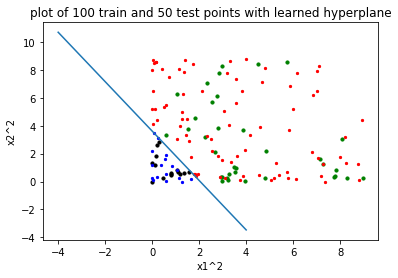

In [0]:
#plotting training data
for i in range(50):
  if dy_test[i] == -1.0:
    plt.scatter(dx_1test[i],dx_2test[i],color='green',s=10)
  else:
    plt.scatter(dx_1test[i],dx_2test[i],color='black',s=10)


#plotting test data
for i in range(n):
  if dy[i] == -1.0:
    plt.scatter(dx_1[i],dx_2[i],color='red',s=5)
  else:
    plt.scatter(dx_1[i],dx_2[i],color='blue',s=5)
#plotting wTx + b
x1 = np.linspace(-4,4,1000)
x2 = []
for i in range(1000):
  temp = -(dw_1solved*x1[i]+db_solved)/dw_2solved
  x2.append(temp)
plt.plot(x1,x2)

plt.xlabel('x1^2')
plt.ylabel('x2^2')
plt.title('plot of 100 train and 50 test points with learned hyperplane')
plt.savefig('2d2.png')
plt.show()

##Part (e) - dual

In [0]:
def kernel_gaussian(x,y,sigma=0.01):
  val = np.matmul(x.T,x) + np.matmul(y.T,y) -2*np.matmul(x.T,y)
  return float(np.exp(-(0.5*val)/(sigma**2)))

In [0]:
def svm_dual(x_1train, x_2train, y_train,kernel_func='gaussian', c=0.001):
  ##making the matrix P,q,g,h
  # p = 100x100
  # q = 100x1
  # G = 202x100
  # h = 202x1
  # sol = alpha1 alpha2 ... alpha100
  accuracy_old = 0.0
  alpha_list=[]
  while c<1.0:
    p = np.zeros((100,100))
    for i in range(100):
      for j in range(100):
        temp1 = np.array([[x_1train[i]],[x_2train[i]]])
        temp2 = np.array([[x_1train[j]],[x_2train[j]]])
        if kernel_func=='gaussian':
          val = kernel_gaussian(temp1,temp2)
        p[i][j] = 0.5*y_train[i]*y_train[j]*val
    q = np.ones((100,1))*-1
    h = np.zeros((202,1))
    for i in range(100):
      h[i] = c
    G = np.zeros((202,100))
    for i in range(100):
      G[i][i] = 1.0
      G[100+i][i] = -1.0
      G[200][i] = y_train[i]
      G[201][i] = -y_train[i]
    P = matrix(p,tc='d')
    Q = matrix(q,tc='d')
    H = matrix(h,tc='d')
    g = matrix(G,tc='d')

    sol = solvers.qp(P,Q,g,H)

    solution = sol['x']
    optimal_val = sol['primal objective']
    y_pred = []
    accuracy = 0
    for i in range(100):
      ans = 0
      for j in range(100):
       ans += solution[j]*y_train[j]*kernel_gaussian(np.array([[x_1train[j]],[x_2train[j]]]),np.array([[x_1train[i]],[x_2train[i]]]))
      y_pred.append(np.sign(ans))

    accuracy=0
    for i in range(100):
      if(y_pred[i]==0.0):
        y_pred[i]==1.0
      if(y_pred[i]==y_train[i]):
        accuracy = accuracy + 1
    #print('accuracy for c = ',c,' on training data is ',max(accuracy/100,1-accuracy/100))
    #accuracy = max(accuracy/100,1-accuracy/100)
    print('accuracy for c = ',c,' on training data is ',accuracy/100)
    if accuracy >= accuracy_old:
      c_opt = c
      accuracy_old = accuracy
      alphas = copy.deepcopy(solution)
    c = c+0.001
    alpha_list.append(solution)
  print('optimal c is :',c_opt,' and accuracy is :',accuracy_old/100)
  return alphas,alpha_list
  



In [0]:
import copy
ex_1 = []
ex_2 = []
ey = []
for i in range(100):
  ex_1.append(cx_1[i])
  ex_2.append(cx_2[i])
  ey.append(cy[i])

In [0]:
(ex_1[25]*ex_1[19]+ex_2[25]*ex_2[19])*0.5

-0.335471557819625

In [0]:
aplha,alpha_list = svm_dual(ex_1,ex_2,ey)

Streaming output truncated to the last 5000 lines.
 5: -1.6528e+01 -1.6528e+01  8e-06  7e-09  3e-13
Optimal solution found.
accuracy for c =  0.44400000000000034  on training data is  1.0
     pcost       dcost       gap    pres   dres
 0: -3.1903e+01 -8.7582e+01  6e+02  5e+00  2e-15
 1: -1.8179e+01 -6.6531e+01  7e+01  3e-01  5e-15
 2: -1.6378e+01 -2.2394e+01  6e+00  6e-03  5e-14
 3: -1.6552e+01 -1.6628e+01  8e-02  7e-05  1e-14
 4: -1.6562e+01 -1.6563e+01  8e-04  7e-07  2e-13
 5: -1.6562e+01 -1.6562e+01  8e-06  7e-09  2e-13
Optimal solution found.
accuracy for c =  0.44500000000000034  on training data is  1.0
     pcost       dcost       gap    pres   dres
 0: -3.1921e+01 -8.7770e+01  6e+02  5e+00  3e-15
 1: -1.8211e+01 -6.6642e+01  7e+01  3e-01  2e-15
 2: -1.6412e+01 -2.2423e+01  6e+00  6e-03  4e-14
 3: -1.6586e+01 -1.6662e+01  8e-02  7e-05  2e-14
 4: -1.6597e+01 -1.6597e+01  8e-04  7e-07  1e-13
 5: -1.6597e+01 -1.6597e+01  8e-06  7e-09  4e-14
Optimal solution found.
accuracy for c =

In [0]:
print(list(aplha))

[0.24975312582712933, 0.998999974087278, 0.2497531258271261, 0.24975312582712456, 0.24975312582719705, 0.24975312582719414, 0.2497531258271941, 0.998999974087278, 0.24975312582715722, 0.998999974087278, 0.24975312582716058, 0.998999974087278, 0.24975312582714904, 0.24975312582716586, 0.24975312582716244, 0.998999974087278, 0.24975312582724704, 0.998999974087278, 0.24975312582726375, 0.24975312582725703, 0.2497531258272465, 0.24975312582727446, 0.24975312582726808, 0.24975312582725986, 0.24975312582723913, 0.998999974087278, 0.998999974087278, 0.998999974087278, 0.2497531258272976, 0.998999974087278, 0.2497531258272973, 0.2496278347792606, 0.24975312582712608, 0.2497531258271261, 0.24975312582712608, 0.998999974087278, 0.249753125827126, 0.998999974087278, 0.998999974087278, 0.24975312582712597, 0.24975312582706055, 0.24975312582706047, 0.24975312582706058, 0.24975312582706058, 0.2497531246658438, 0.2497531258270605, 0.998999974087278, 0.24975312582706052, 0.998999974087278, 0.249753125

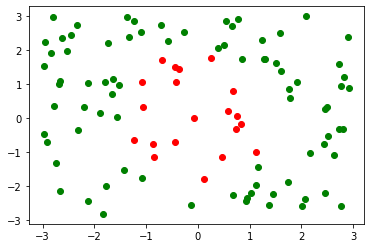

In [0]:
for i in range(100):
  if aplha[i]>0.5:
    plt.scatter(ex_1[i],ex_2[i],color='red')
  else:
    plt.scatter(ex_1[i],ex_2[i],color='green')

In [0]:
new_a = list(aplha)

In [0]:
aplha

<100x1 matrix, tc='d'>

###performing accuracy measure on test data

In [0]:
ex_1test = []
ex_2test = []
ey_test = []
for i in range(50):
  ex_1test.append(np.random.uniform(-3,3))
  ex_2test.append(np.random.uniform(-3,3))
  if (ex_1test[i]*ex_1test[i])+0.5*(ex_2test[i]*ex_2test[i]) <=2:
    ey_test.append(1.0)
  else:
    ey_test.append(-1.0)


In [0]:
aplha[3]

0.24975312582712456

In [0]:

ey_test_pred = []
accuracy = 0
for i in range(50):
  ans = 0
  for j in range(100):
    ans += new_a[j]*ey[j]*kernel_gaussian(np.array([[ex_1[j]],[ex_2[j]]]),np.array([[ex_1test[i]],[ex_2test[i]]]))
  if ans<0 :
    ey_test_pred.append(-1.0)
  else:
    ey_test_pred.append(1.0)


In [0]:
ey_test_pred

[-1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0]

In [0]:
accuracy = 0
for i in range(50):
  if(ey_test_pred[i]==ey_test[i]):
    accuracy = accuracy+1
print('total accuracy = ',accuracy/50)
  

total accuracy =  0.82


In [0]:
print(ey_test)
print(ey_test_pred)

[-1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0]
[-1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0]
